<a href="https://colab.research.google.com/github/JohnNuwan/TMP-Syst/blob/main/Recherche_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow keras  nltk

In [4]:
pip install pickle5


     |████████████████████████████████| 133kB 2.7MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp36-cp36m-linux_x86_64.whl size=218602 sha256=a91bf93fbaf270dfe15dc1976988327b0271e799f947ebe5a1eca1637edc7ee6
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


---

# **Introduction**
Les chatbots sont très utiles autant pour les entreprises que les clients.

La plupart des gens préfèrent parler directement à partir d’une boîte de discussion que d’appeler des centres de service.

Facebook a publié des données qui ont prouvé la valeur des robots. En effet, plus de **2 milliards de messages sont envoyés** par mois entre particuliers et entreprises.

D’après la recherche HubSpot, **71 % des personnes** souhaitent bénéficier de l’assistance clientèle à partir des applications de messagerie. C’est donc un moyen rapide de résoudre leurs problèmes.

Cela dit, les Chatbots ont un bel avenir dans les entreprises.

Maintenant, nous allons créer un projet passionnant sur Chatbot. Nous allons implémenter un chatbot à partir de zéro.

Ce logiciel saura comprendre de quoi parle l’utilisateur et pourra donner une réponse appropriée.

#### **Ce qu’il faut avoir au préalable**

Pour implémenter le chatbot, nous allons d’abord utiliser Keras. C’est une bibliothèque Deep Learning, NLTK, qui est une boîte à outils de traitement du langage naturel ou Natural Language Processing (NLP). Nous avons aussi besoin de quelques bibliothèques utiles. 

---

# **Comment fonctionnent les Chatbots ?**

Les chatbots ne sont autre qu’un logiciel intelligent capable d’interagir et de communiquer avec des gens comme les humains.

Intéressant, non ?

Nous allons maintenant voir comment ils fonctionnent réellement.

Tous les chatbots relèvent des concepts NLP (Natural Language Processing). La NLP comprend deux choses :

*  NLU (Natural Language Understanding) : C’est la capacité des machines à comprendre le langage humain comme l’anglais. le français etc…
*  NLG (Natural Language Generation): C’est la capacité d’une machine à générer du texte similaire à des phrases écrites par des humains.
Imaginez un utilisateur posant une question à un chatbot :

```
Hey, quelles sont les nouvelles d’aujourd’hui ?
```

Le chatbot va diviser la phrase d’utilisateur en deux choses :

*  L’intention et
*  L’entité


L’intention de cette phrase pourrait être avoir_nouvelles car elle fait référence à une action que l’utilisateur veut faire.

L’entité donne des détails spécifiques sur l’intention, donc « aujourd’hui » sera l’entité.

Ainsi, un modèle d’apprentissage automatique est utilisé pour reconnaître les intentions et les entités du chat.

La structure du fichier de projet

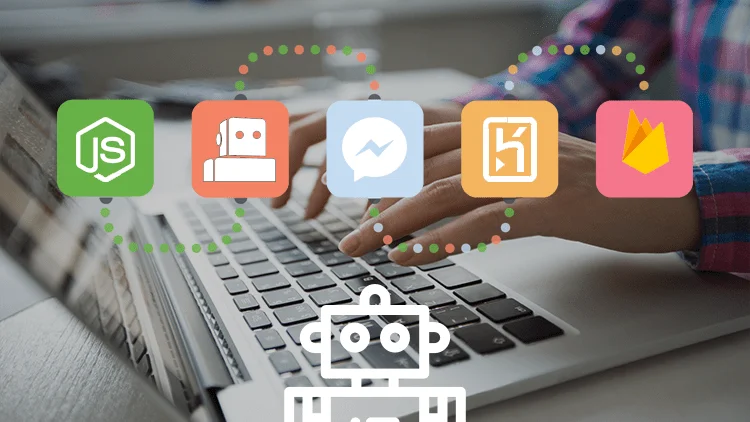

Une fois le projet terminé, vous aurez tous ces fichiers.

Allons voir rapidement chaque fichier. Cela vous donnera une idée de la façon dont le projet sera mis en œuvre.

*  Train_chatbot.py : Dans ce fichier, nous allons créer et former le modèle de deep learning ou apprentissage profond. Ce dernier va classer et identifier ce que l’utilisateur demande au robot.

*  Gui_Chatbot.py : C’est dans ce fichier que nous allons créer une interface utilisateur graphique pour tchatteravec notre chatbot formé.

*  Intents.json : Le fichier d’intents contient toutes les données que nous allons utiliser pour former le modèle. Il comprend une collection de balises avec leurs modèles et réponses correspondants.

*  Chatbot_model.h5 : Il s’agit d’un fichier de format de données hiérarchique dans lequel nous avons sauvegardé les poids et l’architecture de notre modèle formé.

*  Classes.pkl : Le fichier pickle peut être utilisé pour sauvegarder tous les noms de balises à classer lorsque nous prédisons le message.

*  Words.pkl : Le fichier pickle words.pkl contient tous les mots uniques qui constituent le vocabulaire de notre modèle.


In [6]:
 
 import numpy as np
 from keras.models import Sequential
 from keras.layers import Dense, Activation, Dropout
 from keras.optimizers import SGD
 import random
 import nltk
 from nltk.stem import WordNetLemmatizer
 lemmatizer = WordNetLemmatizer()
 import json
 import pickle
 intents_file = open('intents.json').read()
 intents = json.loads(intents_file) 

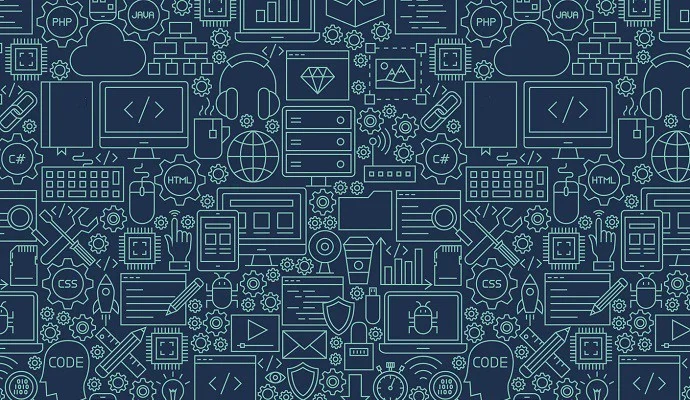

Le modèle ne prend pas les données brutes. Il faut passer par beaucoup de pré-traitements pour que la machine puisse comprendre facilement.

Pour les données textuelles, il y a plusieurs techniques de prétraitement. La première est la  **tokenisation** . Cela consiste à diviser les phrases en mots.

En observant le fichier d‘intents, nous voyons que chaque balise contient une liste de modèles et de réponses.

Nous tokenisons chaque modèle et ajoutons les mots dans une liste.

Nous créons aussi une liste de classes et de documents pour ajouter toutes les intentions associées aux modèles.

In [10]:
#nltk.download('punkt') si probleme compatibilité

words=[]
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        word = nltk.word_tokenize(pattern)
        words.extend(word)        
        #add documents in the corpus
        documents.append((word, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
print(documents) 

[(['Hi', 'there'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hey'], 'greeting'), (['Hola'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Nice', 'chatting', 'to', 'you', ',', 'bye'], 'goodbye'), (['Till', 'next', 'time'], 'goodbye'), (['Thanks'], 'thanks'), (['Thank', 'you'], 'thanks'), (['That', "'s", 'helpful'], 'thanks'), (['Awesome', ',', 'thanks'], 'thanks'), (['Thanks', 'for', 'helping', 'me'], 'thanks'), (['How', 'you', 'could', 'help', 'me', '?'], 'options'), (['What', 'you', 'can', 'do', '?'], 'options'), (['What', 'help', 'you', 'provide', '?'], 'options'), (['How', 'you', 'can', 'be', 'helpful', '?'], 'options'), (['What', 'support', 'is', 'offered'], 'options'), (['How', 'to', 'check', 'Adverse', 'drug', 'reaction', '?'], 'adverse_drug'), (['Open', 'adverse', 'drugs', 'module'], 'adverse_drug'), (['Give', 'm

Une autre technique est la **lemmatisation**.

Elle consiste à convertir les mots en forme de lemme pour réduire tous les mots canoniques.

A titre d’exemple, les mots jouer, jouant, joue, joué, etc. seront tous remplacés par jouer.

Ainsi, nous pouvons réduire le nombre total de mots dans notre vocabulaire. Alors maintenant, nous lemmatisons chaque mot et supprimons les mots en double.

In [12]:
nltk.download('wordnet')
# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb')) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
47 documents
9 classes ['adverse_drug', 'blood_pressure', 'blood_pressure_search', 'goodbye', 'greeting', 'hospital_search', 'options', 'pharmacy_search', 'thanks']
87 unique lemmatized words ["'s", 'a', 'adverse', 'all', 'anyone', 'are', 'awesome', 'be', 'behavior', 'blood', 'by', 'bye', 'can', 'causing', 'chatting', 'check', 'could', 'data', 'day', 'detail', 'do', 'dont', 'drug', 'entry', 'find', 'for', 'give', 'good', 'goodbye', 'have', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'history', 'hola', 'hospital', 'how', 'i', 'id', 'is', 'later', 'list', 'load', 'locate', 'log', 'looking', 'lookup', 'management', 'me', 'module', 'nearby', 'next', 'nice', 'of', 'offered', 'open', 'patient', 'pharmacy', 'pressure', 'provide', 'reaction', 'related', 'result', 'search', 'searching', 'see', 'show', 'suitable', 'support', 'task', 'thank', 'thanks', 'that', 'there', 'till', 'time'

A la fin, les mots contiennent le vocabulaire de notre projet tandis que les classes comprennent toutes les entités à classer.

Pour enregistrer l’objet Python dans un fichier, nous avons utilisé la méthode **pickle.dump()**. Ces fichiers seront utiles une fois la formation terminée et lorsque nous prévoyons les tchats.

---

# **Étape 3. Créer des données de formation et de test**

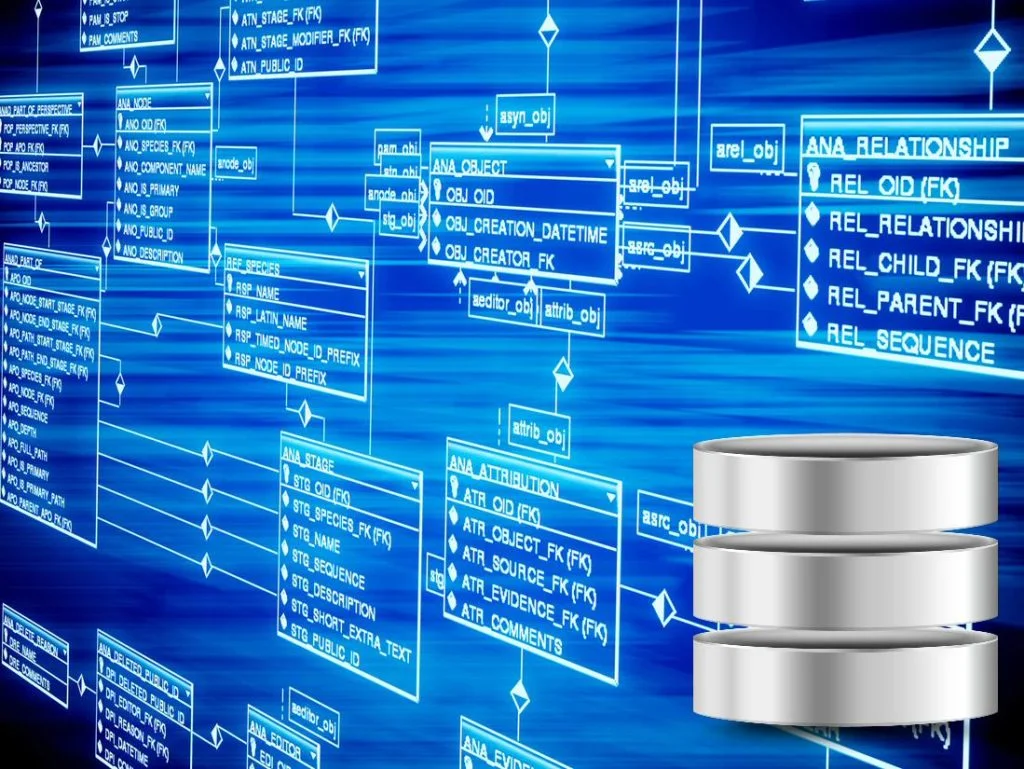

Pour former le modèle, nous allons convertir chaque modèle d’entrée en nombres.

Nous allons d’abord lemmatiser chaque mot du modèle.

Pour cela, il faut créer une liste de zéros de la même longueur que le nombre de tous les mots. Nous allons définir la valeur 1 uniquement pour les index qui contiennent le mot dans les modèles. De la même manière, nous créerons la sortie en définissant la valeur 1 pour la classe d’entrée pour laquelle appartient le modèle.

In [13]:
# create the training data
training = []
# create empty array for the output
output_empty = [0] * len(classes)
# training set, bag of words for every sentence
for doc in documents:
    # initializing bag of words
    bag = []
    # list of tokenized words for the pattern
    word_patterns = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    # create the bag of words array with 1, if word is found in current pattern
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)
        
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])
# shuffle the features and make numpy array
random.shuffle(training)
training = np.array(training)
# create training and testing lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data is created")

Training data is created


## **Étape 4. Former le modèle**

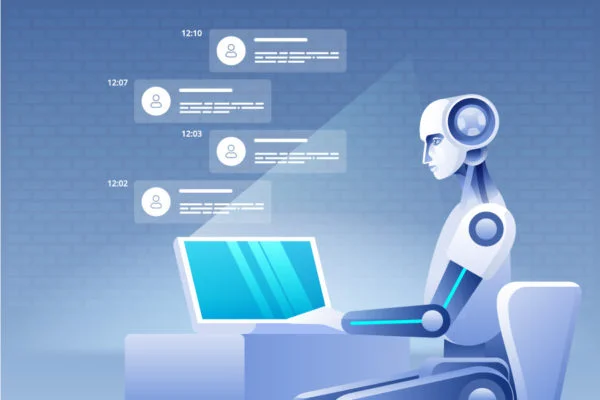

L’architecture de notre modèle sera un réseau neuronal composé de 3 couches denses.

La première couche contient 128 neurones, la seconde a 64 et la dernière aura les mêmes neurones que le nombre de classes.

Les couches de décrochage sont introduites pour réduire le sur-ajustement du modèle. Nous avons utilisé **l’optimiseur SGD** et ajusté les données pour commencer à former le modèle.

Lorsque la formation de 200 époques sera terminée, nous enregistrons le modèle formé en utilisant la fonction Keras **model.save** (« chatbot_model.h5 »).

In [14]:
# deep neural networds model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))
# Compiling model. SGD with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#Training and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)
print("model is created")

Epoch 1/200
10/10 [==============================] - 0s 2ms/step - loss: 2.2665 - accuracy: 0.0426
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 2.1687 - accuracy: 0.1702
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 2.1296 - accuracy: 0.2128
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 2.0233 - accuracy: 0.2340
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 1.9620 - accuracy: 0.3830
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 1.8515 - accuracy: 0.5319
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 1.7841 - accuracy: 0.4468
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5735 - accuracy: 0.4681
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 1.6427 - accuracy: 0.5319
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 1.3466 - accuracy: 0.6170
Epoch 11/

---
## **Étape 5. Interagir avec le chatbot**


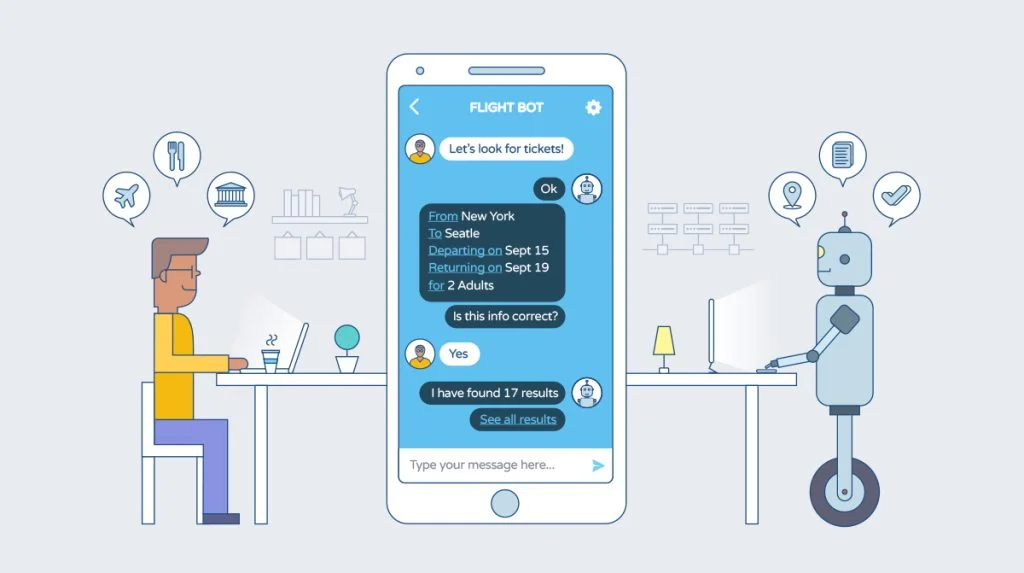

Notre modèle est prêt à tchatter.

Nous allons maintenant créer une belle interface graphique pour notre chatbot dans un nouveau fichier.

Vous pouvez nommer le fichier comme **gui_chatbot.py**

Dans notre fichier GUI, nous utiliserons le module **Tkinter** pour construire la structure de l’application de bureau. Puis, nous allons capturer le message de l’utilisateur et refaire quelques prétraitements avant d’entrer le message dans notre modèle formé.

Le modèle va ensuite prédire la balise du message de l’utilisateur. Puis, nous allons sélectionner aléatoirement la réponse dans la liste des réponses de notre fichier d’intentions ou d’« intents ».

Voici le code source complet du fichier GUI.

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))
def clean_up_sentence(sentence):
    # tokenize the pattern - splitting words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stemming every word - reducing to base form
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words
# return bag of words array: 0 or 1 for words that exist in sentence
def bag_of_words(sentence, words, show_details=True):
    # tokenizing patterns
    sentence_words = clean_up_sentence(sentence)
    # bag of words - vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,word in enumerate(words):
            if word == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % word)
    return(np.array(bag))
def predict_class(sentence):
    # filter below  threshold predictions
    p = bag_of_words(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sorting strength probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result
#Creating tkinter GUI
import tkinter
from tkinter import *
def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    if msg != '':
        ChatBox.config(state=NORMAL)
        ChatBox.insert(END, "You: " + msg + '\n\n')
        ChatBox.config(foreground="#446665", font=("Verdana", 12 )) 
        ints = predict_class(msg)
        res = getResponse(ints, intents)
        
        ChatBox.insert(END, "Bot: " + res + '\n\n')           
        ChatBox.config(state=DISABLED)
        ChatBox.yview(END)
root = Tk()
root.title("Chatbot")
root.geometry("400x500")
root.resizable(width=FALSE, height=FALSE)
#Create Chat window
ChatBox = Text(root, bd=0, bg="white", height="8", width="50", font="Arial",)
ChatBox.config(state=DISABLED)
#Bind scrollbar to Chat window
scrollbar = Scrollbar(root, command=ChatBox.yview, cursor="heart")
ChatBox['yscrollcommand'] = scrollbar.set
#Create Button to send message
SendButton = Button(root, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#f9a602", activebackground="#3c9d9b",fg='#000000',
                    command= send )
#Create the box to enter message
EntryBox = Text(root, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)
#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatBox.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)
root.mainloop()

## **Exécuter le chatbot**
Nous avons maintenant deux fichiers distincts, l’un est le **train_chatbot.py**, que nous allons d’abord utiliser pour former le modèle.

```
python train_chatbot.py
```